Accuracy: 
 80.21
Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

Matrix: 
 [[118  12]
 [ 26  36]]
AUC: 
 0.8595533498759306


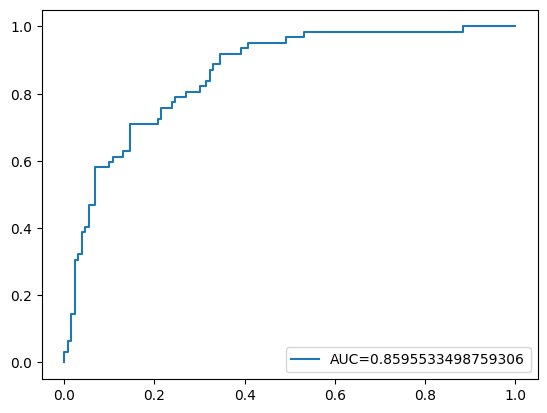

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\diabetes.csv')

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#data preprocessing
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(C=100, max_iter=1000)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: \n", round(accuracy*100,2))

report = metrics.classification_report(y_test, y_pred)
print('Report: \n', report)

matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matrix: \n', matrix)

y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC: \n', auc)
plt.plot(fpr, tpr, label=f"AUC={str(auc)}")
plt.legend(loc=4)
plt.show()
